In [1]:
import warnings
warnings.filterwarnings("ignore")
import modulesForCalibration as mfc
import matplotlib.pyplot as plt

#import readPlotOptionSurface_granular_k2_5 as marketSurface
import readPlotOptionSurfaceedited as marketSurface
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import cmath
import math
from scipy.optimize import fmin


import plotly.plotly as py
import plotly.graph_objs as go

<Figure size 800x600 with 1 Axes>

# This report reflects the work of Lisa He, Alban Zapke, and Naijia Yao, for the project of volatility surface in Computational Methods in Finance with Prof. Hirsa.

## APPL

###  We set up Grid for Model Prices as provided in readPlotOptionSurface.py provided by Prof. Hirsa

### deltaK = 5 & deltaTau = 1/52

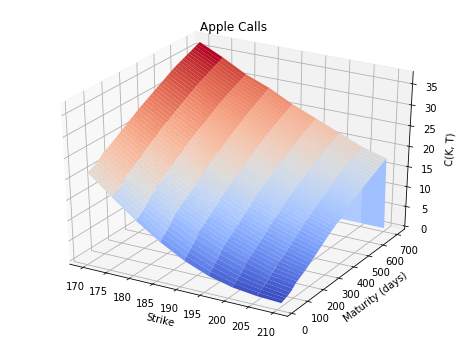

In [2]:
maturities, strikes, marketPrices = marketSurface.readNPlot()

In [3]:
maturities_years = maturities/365

# I. Model Prices

### Global Parameters

In [4]:
# Contract Parameters
S0 = 190
K = 190
k = np.log(K)
# risk free rate
r = 0.0245
# dividend rate
q = 0.005

# Parameters
alpha = 1.5                       # Why?
eta = 0.2

n = 12
N = 2**n

# step-size in log strike space  --> FFT constraint
#lda = (2*np.pi/N)/eta

# Choice of beta
#beta = np.log(S0)-N*lda/2
# beta = np.log(K)

* Grid for Model Prices was set up in readPlotOptionSurface

## 1. Finding a starting point; code provided as in exampleCalibration_FindingStartingPoint.py by Prof. Hirsa

In [5]:
iArray = []                             # The alphas (0,1) which are plotted agains RMSE -> calling it i instead here
rmseArray = []
rmseMin = 1e10                          # Random; in order to have an error to start with

### Model specific parameters:

#### VG

In [6]:
model = 'VG'

#set 1: promising starting point
params1 = (1.0, -0.2, 0.5)
params2 = (3.0, -0.6, 0.10)

In [7]:
lenT = len(maturities_years)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

In [8]:
iArray = []
rmseArray=[]
for i in mfc.myRange(0.0, 1.0, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

In [9]:
len(rmseArray) == len(iArray)

True

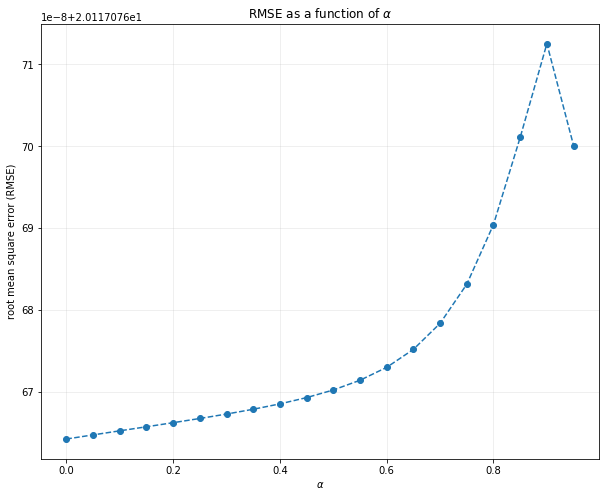

20.11707666421837
[ 3.  -0.6  0.1]


In [10]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
plt.savefig('startingPoint4.png')
plt.show()

print(rmseMin)
print(optimParams)

## 2. Optimization of Parameter Set

#### - Objective Function -

In [11]:
def objFunc(v, x0, x1, x2):
    # Paraboloid centered on (x, y), with scale factors (10, 20) and minimum 30
    return 10.0*(v[0]-x0)**2 + 20.0*(v[1]-x1)**2 + 30.0*(v[2]-x2)**2 + 40.0

In [12]:
lenT = len(maturities)
lenK = len(strikes)

#### A) Brute Force Algorithm 

In [13]:
# maturities, strikes, marketPrices = marketSurface.readNPlot()

#==========================================
# Grid Search around the starting point
#------------------------------------------
# [ 3.  -0.6  0.1]
ind_iter = 1
rmseMin = 1.0e6

for kappa in mfc.myRange(2.5,3.5,0.5):
    for theta in mfc.myRange(-0.7,-0.5,0.1):
        for sig in mfc.myRange(0.,0.2,0.1):
            params = []
            params.append(kappa)
            params.append(theta)
            params.append(sig)
                    
                    
            print('i = ' + str(ind_iter))
            ind_iter += 1
            print(params)
            rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
                    
            if (rmse < rmseMin):
                rmseMin = rmse
                params2 = params
                print('\nnew min found')
                print(rmseMin)
                print(params2)
                print('')

print('\nSolution of grid search:')                        
print(params2)
print('Optimal rmse = ' + str(rmseMin))

i = 1
[2.5, -0.7, 0.0]

new min found
20.117076621078315
[2.5, -0.7, 0.0]

i = 2
[2.5, -0.7, 0.1]
i = 3
[2.5, -0.7, 0.2]
i = 4
[2.5, -0.6, 0.0]
i = 5
[2.5, -0.6, 0.1]
i = 6
[2.5, -0.6, 0.2]
i = 7
[2.5, -0.5, 0.0]
i = 8
[2.5, -0.5, 0.1]
i = 9
[2.5, -0.5, 0.2]
i = 10
[3.0, -0.7, 0.0]
i = 11
[3.0, -0.7, 0.1]
i = 12
[3.0, -0.7, 0.2]
i = 13
[3.0, -0.6, 0.0]
i = 14
[3.0, -0.6, 0.1]
i = 15
[3.0, -0.6, 0.2]
i = 16
[3.0, -0.5, 0.0]
i = 17
[3.0, -0.5, 0.1]
i = 18
[3.0, -0.5, 0.2]
i = 19
[3.5, -0.7, 0.0]
i = 20
[3.5, -0.7, 0.1]
i = 21
[3.5, -0.7, 0.2]
i = 22
[3.5, -0.6, 0.0]
i = 23
[3.5, -0.6, 0.1]
i = 24
[3.5, -0.6, 0.2]
i = 25
[3.5, -0.5, 0.0]
i = 26
[3.5, -0.5, 0.1]
i = 27
[3.5, -0.5, 0.2]

Solution of grid search:
[2.5, -0.7, 0.0]
Optimal rmse = 20.117076621078315


In [ ]:
# Solution of grid search:
# [2.5, -0.7, 0.0]

#### B) Nelder Mead Algorithm  (Gradient-free) from exampleCalibration_NelderMead.py

In [14]:
#==========================================
# Nelder-Mead Simplex Algorithm -- fmin
#==========================================
# [ 2.3     0.046   0.0825 -0.53    0.054 ]

params = [ 3. , -0.6  ,0.1]

def callbackF(xi):
    global num_iter
    global arg
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
#xopt, fopt, iters, funcalls, warnflag, allvecs = fmin(
t = fmin(
        mfc.eValue, 
        params, 
        args=arg, 
        xtol=1e-4,
        ftol=1e-4,
        maxiter=100,
        maxfun=400,
        callback=callbackF,
        disp=True,
        retall=False,
        full_output=True)

print('optimal params = ')
print(t[0])
print('f = ' + str(t[1]))

i = 1
x_i = [ 2.7   -0.63   0.105]
f_i = 20.117076646493715
i = 2
x_i = [ 2.7   -0.63   0.105]
f_i = 20.117076646493715
i = 3
x_i = [ 2.5        -0.7         0.10333333]
f_i = 20.11707662186648
i = 4
x_i = [ 2.         -0.71        0.10666667]
f_i = 20.117076590305153
i = 5
x_i = [ 1.6        -0.76        0.11833333]
f_i = 20.117076548813024
i = 6
x_i = [ 1.36666667 -0.81666667  0.11388889]
f_i = 20.11707651404004
i = 7
x_i = [ 1.36666667 -0.81666667  0.11388889]
f_i = 20.11707651404004
i = 8
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i = 20.117076481210383
i = 9
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i = 20.117076481210383
i = 10
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i = 20.117076481210383
i = 11
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i = 20.117076481210383
i = 12
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i = 20.117076481210383
i = 13
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i = 20.117076481210383
i = 14
x_i = [ 1.04444444 -0.88777778  0.12703704]
f_i

In [ ]:
# AT 199 ITERATIONS IT BLEW UP - MAX # OF ITERATIONS
#[ 0.25516931 -1.56131394  0.14571389]


#### C) BFGS Algorithm (Gradient-based) from exampleCalibration_BFGS.py

In [15]:
import warnings
warnings.filterwarnings("ignore")

import modulesForCalibration as mfc

from scipy.optimize import fmin_bfgs

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

params = [ 3. , -0.6  ,0.1]

def callbackF(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = fmin_bfgs(
        mfc.eValue,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF,
        maxiter=20,
        full_output=True, 
        retall=False)

print('optimal params = ')
print(xopt)
print('f = ' + str(fopt))


Optimization terminated successfully.
         Current function value: 20.117077
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1
optimal params = 
[ 3.  -0.6  0.1]
f = 20.11707666421837


In [ ]:
#optimal params = 
#[ 3.  -0.6  0.1]

### Evaluate which Optimization yields best results: Loss Function

In [16]:
# set 1: Brute-Force vs. Nelder-Mead
params_BF = [2.5, -0.7, 0.0]
params_NM = [ 0.25516931 ,-1.56131394  ,0.14571389]

In [17]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(0, 1, 1):
    
    params = i*np.array(params_BF) + (1.0-i)*np.array(params_NM)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)


0
[ 0.25516931 -1.56131394  0.14571389]

1
[ 2.5 -0.7  0. ]
18.466093798774228
[ 0.25516931 -1.56131394  0.14571389]


In [ ]:
#optimal results are:
#[ 0.25516931 -1.56131394  0.14571389]
#NM is better

***Concludes that NM Parameters yield better result ***

In [18]:
# set 2: Brute-Force vs. BFGS
params_BF = [2.5, -0.7, 0.0]
params_BFGS = [ 3. , -0.6 , 0.1]

In [19]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(0,1,1):
    
    params = i*np.array(params_BF) + (1.0-i)*np.array(params_BFGS)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)


0
[ 3.  -0.6  0.1]

1
[ 2.5 -0.7  0. ]
20.117076621078315
[ 2.5 -0.7  0. ]


In [ ]:
#optimal results are 
#[ 2.5 -0.7  0. ]

In [ ]:
#BF yields better result

In [20]:
# set 3: NelderMead vs. BFGS
params_NM =  [ 0.25516931 ,-1.56131394  ,0.14571389]
params_BFGS = [ 3. , -0.6 , 0.1]

In [21]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(0,1,1):
    
    params = i*np.array(params_NM) + (1.0-i)*np.array(params_BFGS)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)


0
[ 3.  -0.6  0.1]

1
[ 0.25516931 -1.56131394  0.14571389]
18.466093798774228
[ 0.25516931 -1.56131394  0.14571389]


In [ ]:
#Optimal results are:
#[ 0.25516931 -1.56131394  0.14571389]

In [ ]:
#NM is the best

# II. Local Volatility Surface

** Explicitly compute local volatility for each point in our grid **

## 1. Calculate Finite differences

In [22]:
deltaK = 5
deltaT = 1/52 

In [23]:

params_NM =  [ 0.25516931 ,-1.56131394  ,0.14571389]
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params_NM, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]

In [24]:
modelPrices.shape

(98, 9)

In [25]:
# v_j,k Option prices for all points on the grid
modelPrices_df = pd.DataFrame(modelPrices, columns = strikes)
modelPrices_df.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002
1,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003
2,0.000006,0.000006,0.000005,0.000005,0.000005,0.000005,0.000005,0.000004,0.000004
3,0.000008,0.000007,0.000007,0.000007,0.000006,0.000006,0.000006,0.000006,0.000006
4,0.000010,0.000009,0.000009,0.000009,0.000008,0.000008,0.000008,0.000007,0.000007


#### dC/dT for every point on the grid

In [26]:
dcdT = (modelPrices_df.diff()/deltaT).shift(-1)
dcdT.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,0.000066,0.000063,0.000061,0.000058,0.000056,0.000054,0.000051,0.000050,0.000048
1,0.000078,0.000074,0.000071,0.000068,0.000065,0.000063,0.000060,0.000058,0.000056
2,0.000091,0.000087,0.000083,0.000080,0.000077,0.000074,0.000071,0.000068,0.000066
3,0.000107,0.000102,0.000098,0.000094,0.000090,0.000087,0.000083,0.000080,0.000077
4,0.000125,0.000120,0.000115,0.000110,0.000106,0.000102,0.000098,0.000094,0.000091


#### dC/dK for every point on the grid

In [27]:
dcdK = (modelPrices_df.diff(axis=1, periods = 2)/(2*deltaK)).shift(-1,axis=1)
dcdK.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,-2.688206e-08,-2.501224e-08,-2.332563e-08,-2.179134e-08,-2.038886e-08,-1.911301e-08,-1.795076e-08,NaN
1,NaN,-3.755102e-08,-3.494411e-08,-3.258887e-08,-3.044738e-08,-2.849243e-08,-2.671169e-08,-2.508686e-08,NaN
2,NaN,-5.004276e-08,-4.657424e-08,-4.343751e-08,-4.058616e-08,-3.798508e-08,-3.561391e-08,-3.344822e-08,NaN
3,NaN,-6.466939e-08,-6.019350e-08,-5.614313e-08,-5.246172e-08,-4.910487e-08,-4.604313e-08,-4.324489e-08,NaN
4,NaN,-8.179779e-08,-7.614378e-08,-7.102498e-08,-6.637270e-08,-6.213165e-08,-5.826200e-08,-5.472379e-08,NaN


In [28]:
# For vol surface calculation
dcdK_v = dcdK
for i in modelPrices_df.columns:
    dcdK_v[i] = i * dcdK[i]*(r-q)

In [29]:
dcdK_v.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,-9.173502e-08,-8.779295e-08,-8.414722e-08,-8.073692e-08,-7.752862e-08,-7.454074e-08,-7.175815e-08,NaN
1,NaN,-1.281429e-07,-1.226538e-07,-1.175644e-07,-1.128075e-07,-1.083425e-07,-1.041756e-07,-1.002847e-07,NaN
2,NaN,-1.707709e-07,-1.634756e-07,-1.567008e-07,-1.503717e-07,-1.444383e-07,-1.388943e-07,-1.337093e-07,NaN
3,NaN,-2.206843e-07,-2.112792e-07,-2.025364e-07,-1.943707e-07,-1.867213e-07,-1.795682e-07,-1.728714e-07,NaN
4,NaN,-2.791349e-07,-2.672647e-07,-2.562226e-07,-2.459108e-07,-2.362556e-07,-2.272218e-07,-2.187583e-07,NaN


#### d2C/dK2 for every point on the grid

In [30]:
# For d2C/dK2: - 2*v_j,k
modelPrices_df_neg2 = modelPrices_df*(-2)

In [31]:
modelPrices_df_neg2.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,-0.000006,-0.000006,-0.000006,-0.000006,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
1,-0.000009,-0.000009,-0.000008,-0.000008,-0.000008,-0.000007,-0.000007,-0.000007,-0.000006
2,-0.000012,-0.000011,-0.000011,-0.000010,-0.000010,-0.000010,-0.000009,-0.000009,-0.000009
3,-0.000015,-0.000015,-0.000014,-0.000014,-0.000013,-0.000012,-0.000012,-0.000012,-0.000011
4,-0.000019,-0.000019,-0.000018,-0.000017,-0.000016,-0.000016,-0.000015,-0.000015,-0.000014


In [32]:
d2cdK2 = pd.DataFrame()
for i in range(len(modelPrices_df.columns)): 
    try:
        d2cdK2[modelPrices_df.columns[i]] = (modelPrices_df[modelPrices_df.columns[i-1]] + modelPrices_df[modelPrices_df.columns[i+1]] -2* modelPrices_df[modelPrices_df.columns[i]])/(deltaK**2)
    except: 
        d2cdK2[modelPrices_df.columns[i]] = np.repeat(np.nan, len(modelPrices_df))

In [33]:
modelPrices_df.shape == modelPrices_df_neg2.shape == d2cdK2.shape

True

In [34]:
d2cdK2[modelPrices_df.columns[0]] = np.repeat(np.nan, len(modelPrices_df))
d2cdK2.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,3.944432e-10,3.534851e-10,3.211566e-10,2.925597e-10,2.684348e-10,2.419036e-10,2.229980e-10,NaN
1,NaN,5.490295e-10,4.937331e-10,4.483624e-10,4.082343e-10,3.737469e-10,3.385469e-10,3.113852e-10,NaN
2,NaN,7.297721e-10,6.576346e-10,5.970582e-10,5.434838e-10,4.969478e-10,4.515169e-10,4.147606e-10,NaN
3,NaN,9.411270e-10,8.492310e-10,7.709147e-10,7.016511e-10,6.410876e-10,5.836095e-10,5.356864e-10,NaN
4,NaN,1.188332e-09,1.073272e-09,9.742468e-10,8.866657e-10,8.097520e-10,7.381101e-10,6.771744e-10,NaN


In [35]:
# For vol surface calculation
d2cdK2_v = d2cdK2
for i in modelPrices_df.columns:
    d2cdK2_v[i] = i**2 * d2cdK2[i] * 1/2

In [36]:
d2cdK2_v.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,0.000006,0.000006,0.000005,0.000005,0.000005,0.000005,0.000005,NaN
1,NaN,0.000008,0.000008,0.000008,0.000007,0.000007,0.000007,0.000007,NaN
2,NaN,0.000011,0.000011,0.000010,0.000010,0.000009,0.000009,0.000009,NaN
3,NaN,0.000014,0.000014,0.000013,0.000013,0.000012,0.000012,0.000011,NaN
4,NaN,0.000018,0.000017,0.000017,0.000016,0.000015,0.000015,0.000014,NaN


In [37]:
dcdT.shape == modelPrices_df.shape == dcdK_v.shape == d2cdK2_v.shape

True

## 2. Calculate Local Volatility Surface

In [38]:
# Vol Surface 
vol_surface = ((dcdT + dcdK_v + q*modelPrices_df)/d2cdK2_v)**0.5

In [39]:
vol_surface

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,3.232818,3.249138,3.247655,3.246071,3.236800,3.260535,3.250994,NaN
1,NaN,2.968477,2.978446,2.977961,2.977407,2.972321,2.986558,2.981317,NaN
2,NaN,2.789037,2.795641,2.795656,2.795619,2.792715,2.801946,2.798935,NaN
3,NaN,2.660226,2.664862,2.665147,2.665389,2.663732,2.670050,2.668309,NaN
4,NaN,2.564263,2.567666,2.568101,2.568498,2.567594,2.572101,2.571127,NaN
5,NaN,2.490898,2.493488,2.494004,2.494486,2.494054,2.497379,2.496886,NaN
6,NaN,2.433757,2.435790,2.436346,2.436871,2.436741,2.439264,2.439079,NaN
7,NaN,2.388647,2.390285,2.390855,2.391397,2.391462,2.393424,2.393439,NaN
8,NaN,2.352682,2.354031,2.354599,2.355141,2.355330,2.356891,2.357034,NaN
9,NaN,2.323801,2.324934,2.325489,2.326020,2.326288,2.327553,2.327777,NaN


In [40]:
vol_surface_new = vol_surface[[175.0, 180.0,185.0,190.0,195.0,200.0,205.0]]
#pd.DataFrame.to_csv(vol_surface)

In [41]:
vol_surface_new = vol_surface_new.loc[np.arange(0,97)]

In [42]:
import plotly
plotly.tools.set_credentials_file(username='lisayhe', api_key='FioDIUbTjZMAu76NCdei')

In [43]:

data = [
    go.Surface(
        z=vol_surface_new.as_matrix()
    )
]
layout = go.Layout(
    title='Apple VG Call Vol Surface',
    autosize=True,
    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Apple_VG_Call', auto_open=True)